<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению.

### <center> Автор материала: Тышов Никита @nikt

# Keystroke biometrics

## 1. Описание набора данных и признаков

<B> Ценность исследования. </B> 

Очередная задача биометрической идентификации человека. Задача основана на идее о том, что биометрические признаки: отпечаток пальца, лицо, рисунок сетчатки, рисунок радужки и т.д. трудно подделать так как они уникальны и формируются под огромным количеством несвязанных факторов и не поддаются корректировке. Однако, как показало время, технологии не стоят на месте, и параллельно росту качества систем распознавания растет и качество систем взлома. Так биометрические признаки являются устойчивыми довольно длительное время, поэтому их можно попробовать скопировать и подложить, как например с отпечатками пальцев и лицами. Поэтому идут поиски систем на основе поведенческой биометрии. Поведение так же считается уникальным, при этом его довольно трудно скопировать.

Keystroke biometrics рассматривает различные ситуации: верификация человека на основе свободно набираемого текста, или на основе определенно набираемого текста, на основе текста который просит система и т.д. вариаций может быть множество и каждая хороша в своих условиях. Здесь будет рассмотренна распространненая ситуация, когда ваш логин  и пароль был скомпрометирован. То есть, злоумышленник без лишних хлопот может войти в нужный ему аккаунт. Сейчас в основном такая ситуация разрешается при помощи двухфакторной верификации, но это не отменяет попыток найти альтернативы. В данной ситуации двухфакторной верификации нет и необходимо верифицировать пользователя по поведению в наборе пароля.

Также определю два общих для биометрических систем термина: верификация - это когда мы знаем кто стучится, например на основе логина, и пытаемся сказать тот человек или не тот, обычно это задача one-vs-all, то есть бинарная. И идентификация - это когда мы не знаем о человеке ничего кроме его биометрических характеристик и пытаемся найти его в базе или сказать, что такого человека мы вообще не знаем, такая задача почти является классификацией, но классов здесь обычно неограниченное число.

<B>Процесс сбора данных.</B> 
http://www.cs.cmu.edu/~keystroke/DSL-StrongPasswordData.csv

Датасет был собран в <I>Carnegie Mellon University</I> для испытания различных моделей распознавания. Датасет представляет собой тайминг нажатий клавишь на клавиатуре при вводе пароля .tie5Roanl. Пароль был сгенериван случайно и по правилам составляния паролей является сложным так как содержит и знаки препинания и цифры, большие и маленькие буквы. Также пароль имеет приемлемую длину в 10 символов. Основная мотивация при составлении датасета была следующая: предположим что злоумышленнык знает пароль, сможем ли мы идентифицировать его только по стилю набора. 
    
Были вызваны случайные 51 человек, каждый из которых в течении 8 сессий( каждая сессия проходила не чаще чем раз в день) набирал этот пароль 50 раз. Ошибки ввода не принимались, то есть при совершении ошибки необходимо было перенабирать пароль заново. Данные собраны очень грамотно, распределенны во времени и позволяют привыкнуть к паролю, что имитирует ситуацию когда пароль вводится на автомате "мышечной памятью". Следовательно так как пароль один и все испытуемые видели его впервые и набирали в одних и тех же условиях, единственным их отличием должно стать именно поведение.

<B>Целевая переменная.</B> 

Целевой переменной является соответствие личности входящего, личности шаблона или класса с которым его сравнивают.

<B>Описание признаков.</B> 

Как уже было сказано, датасет содержит 51 человека по 8 сессий по 50 наборов, в сумме 20400 записей, и 34 признака.
* subject - id объекта(человека)
* sessionIndex - номер сессии
* rep - номер попытки внутри сессии

Далее идут временный интервалы. Определим:
* key-down : kd - момент нажатия клавиши
* key-up : ku - момент отпускания клавиши
* key - определенная клавиша у нас это . t i e ...

Признаки
* H.key - время удержания key т.е ku.key-kd.key
* DD.key1.key2 - время между kd следующих друг за другом клавишь т.е kd.key2 - kd.key1
* UD.key1.key2 - время между ku первой клавиши и kd следующей т.е kd.key2 - ku.key1



## 2. Первичный анализ данных

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn
import numpy as np

%matplotlib inline

In [41]:
data = pd.read_csv('../../../DSL-StrongPasswordData.csv')

Посмотрим на данные.

In [42]:
data.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [43]:
data.shape

(20400, 34)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 34 columns):
subject            20400 non-null object
sessionIndex       20400 non-null int64
rep                20400 non-null int64
H.period           20400 non-null float64
DD.period.t        20400 non-null float64
UD.period.t        20400 non-null float64
H.t                20400 non-null float64
DD.t.i             20400 non-null float64
UD.t.i             20400 non-null float64
H.i                20400 non-null float64
DD.i.e             20400 non-null float64
UD.i.e             20400 non-null float64
H.e                20400 non-null float64
DD.e.five          20400 non-null float64
UD.e.five          20400 non-null float64
H.five             20400 non-null float64
DD.five.Shift.r    20400 non-null float64
UD.five.Shift.r    20400 non-null float64
H.Shift.r          20400 non-null float64
DD.Shift.r.o       20400 non-null float64
UD.Shift.r.o       20400 non-null float64
H.o           

В данных нет пропусков. Также можно заметить дополнительные нажатия shift и enter: H.Shift.r, H.Return.

Первые три признака subject, sessionIndex, rep как таковыми признаками не являются, это идентификаторы позволяющие определять принадлежность данных. Далее мы их уберем.

Посмотрим на статистику в данных.

In [45]:
data.describe()

,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,...,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,4.500000,25.500000,0.093379,0.264148,0.170769,0.085727,0.169085,0.083358,0.081565,0.159372,...,0.106259,0.150670,0.044411,0.089899,0.202630,0.112731,0.095589,0.321847,0.226259,0.088306
std,2.291344,14.431223,0.029626,0.220534,0.226836,0.027424,0.123546,0.125755,0.026887,0.226928,...,0.038828,0.107422,0.105197,0.030738,0.150191,0.159571,0.028348,0.225389,0.230759,0.027452
min,1.000000,1.000000,0.001400,0.018700,-0.235800,0.009300,0.001100,-0.162100,0.003200,0.001400,...,0.004000,0.001100,-0.235500,0.003700,0.001300,-0.175800,0.003700,0.008300,-0.124500,0.002900
25%,2.750000,13.000000,0.074400,0.146900,0.049800,0.066000,0.113600,0.027200,0.062000,0.089300,...,0.082100,0.096100,-0.009000,0.067300,0.127600,0.023500,0.077400,0.210000,0.114100,0.069900
50%,4.500000,25.500000,0.089500,0.205950,0.108700,0.081000,0.140400,0.057800,0.077100,0.120900,...,0.101900,0.125000,0.022700,0.085300,0.172500,0.095500,0.093700,0.263000,0.160300,0.085500
75%,6.250000,38.000000,0.107900,0.306450,0.212400,0.099800,0.183900,0.096400,0.096900,0.173100,...,0.122300,0.174600,0.068900,0.107900,0.228800,0.145700,0.111100,0.350200,0.255100,0.103700
max,8.000000,50.000000,0.376100,12.506100,12.451700,0.241100,4.919700,4.799900,0.331200,25.987300,...,2.035300,3.327800,2.524200,0.357700,4.025200,3.978200,0.340700,5.883600,5.836400,0.265100


Для лучшего рассмотрения разобьем описание по типам признаков: отдельно для H, DD и UD

In [46]:
data[[x for x in data.columns if 'H' in x]].describe()

,H.period,H.t,H.i,H.e,H.five,H.Shift.r,H.o,H.a,H.n,H.l,H.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,0.093379,0.085727,0.081565,0.089138,0.076904,0.095937,0.088354,0.106259,0.089899,0.095589,0.088306
std,0.029626,0.027424,0.026887,0.030635,0.021746,0.033900,0.026427,0.038828,0.030738,0.028348,0.027452
min,0.001400,0.009300,0.003200,0.002100,0.001400,0.001400,0.006900,0.004000,0.003700,0.003700,0.002900
25%,0.074400,0.066000,0.062000,0.068600,0.061000,0.070200,0.071500,0.082100,0.067300,0.077400,0.069900
50%,0.089500,0.081000,0.077100,0.083400,0.074200,0.093500,0.086300,0.101900,0.085300,0.093700,0.085500
75%,0.107900,0.099800,0.096900,0.102700,0.090600,0.116700,0.101900,0.122300,0.107900,0.111100,0.103700
max,0.376100,0.241100,0.331200,0.325400,0.198900,0.281700,0.687200,2.035300,0.357700,0.340700,0.265100


In [47]:
data[[x for x in data.columns if 'DD' in x]].describe()

,DD.period.t,DD.t.i,DD.i.e,DD.e.five,DD.five.Shift.r,DD.Shift.r.o,DD.o.a,DD.a.n,DD.n.l,DD.l.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,0.264148,0.169085,0.159372,0.377434,0.438887,0.250921,0.156931,0.150670,0.202630,0.321847
std,0.220534,0.123546,0.226928,0.265342,0.260343,0.174533,0.106557,0.107422,0.150191,0.225389
min,0.018700,0.001100,0.001400,0.001300,0.169400,0.049400,0.001200,0.001100,0.001300,0.008300
25%,0.146900,0.113600,0.089300,0.216600,0.307900,0.156500,0.106400,0.096100,0.127600,0.210000
50%,0.205950,0.140400,0.120900,0.289000,0.377500,0.201350,0.131600,0.125000,0.172500,0.263000
75%,0.306450,0.183900,0.173100,0.456850,0.486025,0.283425,0.167600,0.174600,0.228800,0.350200
max,12.506100,4.919700,25.987300,4.961800,8.370200,4.152300,2.856700,3.327800,4.025200,5.883600


In [48]:
data[[x for x in data.columns if 'UD' in x]].describe()

,UD.period.t,UD.t.i,UD.i.e,UD.e.five,UD.five.Shift.r,UD.Shift.r.o,UD.o.a,UD.a.n,UD.n.l,UD.l.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,0.170769,0.083358,0.077806,0.288295,0.361983,0.154984,0.068577,0.044411,0.112731,0.226259
std,0.226836,0.125755,0.228512,0.266695,0.260886,0.181619,0.108509,0.105197,0.159571,0.230759
min,-0.235800,-0.162100,-0.160000,-0.150500,0.085600,-0.086500,-0.228700,-0.235500,-0.175800,-0.124500
25%,0.049800,0.027200,0.007400,0.133200,0.229675,0.054700,0.017000,-0.009000,0.023500,0.114100
50%,0.108700,0.057800,0.041200,0.200400,0.302000,0.102200,0.044400,0.022700,0.095500,0.160300
75%,0.212400,0.096400,0.093400,0.369400,0.408900,0.191000,0.080300,0.068900,0.145700,0.255100
max,12.451700,4.799900,25.915800,4.882700,8.290800,4.012000,2.815200,2.524200,3.978200,5.836400


Оказывается UD может быть отрицательным, это говорит о том, что человек нажимает следующую клавишу до того как отпустил предыдущую.

Выделим идентификаторы в отдельный датафрейм, чтобы они нам не мешали.

In [49]:
indx_col = ['subject','sessionIndex','rep']
indx = data[indx_col]
label = [ int(x[1:]) for x in data['subject']]
features = data.drop(columns=indx_col)

## 3. Первичный визуальный анализ данных

Исследуем корреляцию Пирсона числовых признаков.

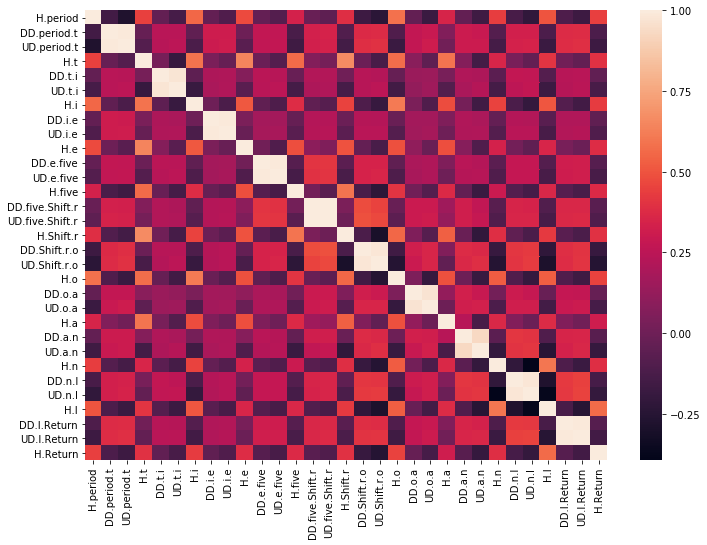

In [50]:
a4_dims = (11.7, 8.27)
df = features.corr()
fig, ax = pyplot.subplots(figsize=a4_dims)
seaborn.heatmap(ax=ax, data=df)

По матрице корреляции выявлена сильная зависимость между UD и DD признаками на каждом символе. Посмотрев после этого на данные более пристально, понял, что DD = H + UD. Вспомним, что 
* DD = kd.key2 - kd.key1 
* UD = kd.key2 - ku.key1 
* H = ku.key1 - kd.key1
Удалим DD как избыточный признак, и еще раз посмотрим на матрицу корреляции.

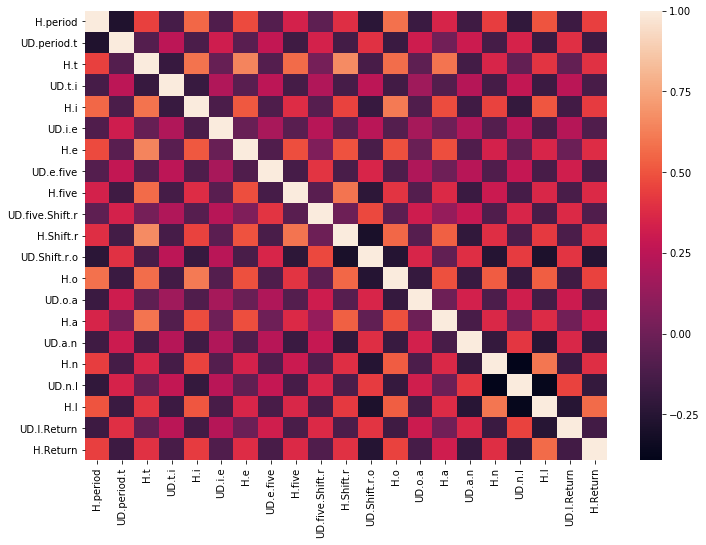

In [51]:
features_H_UD = features.drop(columns=[x for x in features.columns if 'DD' in x])
df = features_H_UD.corr()
fig, ax = pyplot.subplots(figsize=a4_dims)
seaborn.heatmap(ax=ax, data=df)

Уже лучше. Больше сильных корреляций не наблюдается. Попробуем применить PCA и разложить вектора на плоскости, вдруг все испытуемые хорошо линейно разделимы и лежат обособленно в кластерах.

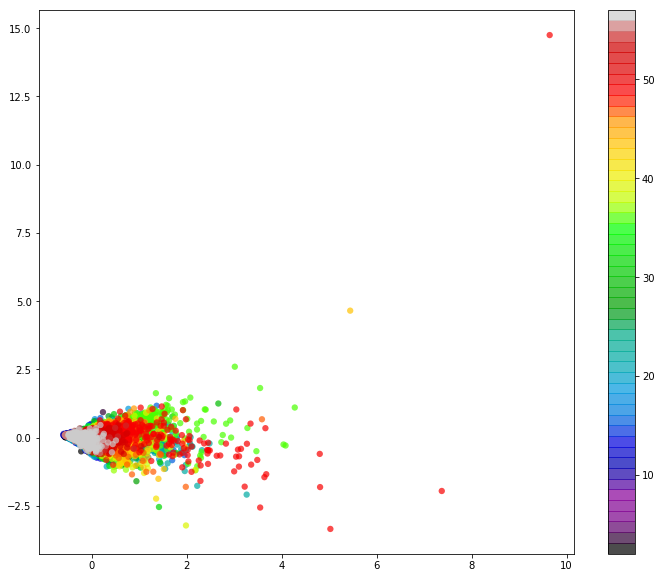

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_H_UD)

plt.figure(figsize=(12,10))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=label, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 51))
plt.colorbar()

Так просто данные разделить не получилось. Посмотрим какую дисперсию описывают признаки.

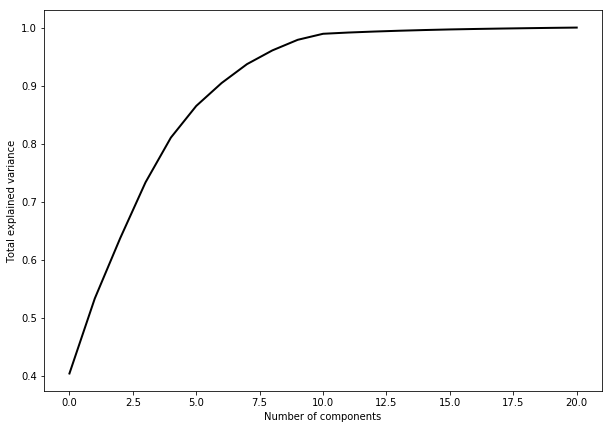

In [53]:
pca = PCA().fit(features_H_UD)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

Видно, что двух измерений очень мало. С данными необходимо работать как с многомерными векторами.

Визуальный анализ выявил корреляции которые были пропущены при знакомстве с датасетом. Корреляции устранены. Опробован PCA в качестве оценки решения в лоб. Визуально задача в двухмерном пространсве не решается, потому что двух и трех измерений очень мало. 

## 4. Инсайты, найденные зависимости

В целом данные не содержат инстайтов, пробелов и каких либо упущений которые бы сделали данные невалидными. В процессе визуального и первичного анализа выявлены и устранены зависимые переменные и обнаружена не тривиальная оссобенность признаков UD, говорящая о том, что при печати испытуемые могут нажимать следующую клавишу перед тем как отпустили предыдущую.

## 5. Выбор метрики

В качестве основной метрики для оценки качества модели выбран критерий ROC-AUC. Такая метрика хорошо работает с несбалансированными классами. Разбалансированность обычное дело в задачах верификации. В  биометрии ROC кривая является основным показателем качества, так же по нему подбирают пороги при которых насколько возможно минимизируется False positive rate(FPR - ложный пропуск, когда мы пропускаем не того), обычно при уменьшении FAR уменьшается и True positive rate(TPR - пропуск своего, когда мы пропускаем того кого надо) ROC кривая позволяет найти компромисс.

## 6. Выбор модели

Основной задачей является задача верификации, когда нам необходимо определить тот человек или не тот, с учетом того, что мы знаем, кто должен верифицироваться. То есть, это бинарная классификация. Так как у нас 51 человек, получается необходимо будет обучить 51 бинарный классификатор. 

Попробуем решить задачу несколькими методами:
    - метрический, решение принимается на основании расстояния до среднего вектора в классе, будет рассмотрен как линейный классификатор
    - RandomForestClassifier , будет рассмотрен как нелинейный классификатор
    


## 7. Предобработка данных

Данные являются зависимыми во времени, так как пароль вводился в восьми последовательных сеансах. Учтем, что пользователь во время ввода привыкал к паролю и поведение в процессе менялось. Для обучения будем брать первые 3 сеанса верефицируемого пользователя, то есть первые 150 вводов, это не очень правдоподобно(заставить пользователя при регистрации ввести пароль 150 раз не очень гуманно), но и не фантастика. А остальные 250 для теста. В качестве второго класса(атакующих) возьмем по 5 первых последовательных попыток для обучения. А для теста возьмем еще по 5 начиная с 6 с шагом 79, так у нас будет имитация того, что злоумышленник тренируется в набивании пароля.

Так как потребуется обучать много классификаторов, по одному на каждого испытуемого, пересоберем данные в удобный словарь, чтобы было легко их доставать в зависимости от целевого испытуемого. Признаки упакуем в вектор. Так как данные изначально правильно отсортированы это можно сделать последовательно. Дополнительно напишем функцию по разделению данных на классы в зависимости от того какой человек верифицируется.

In [54]:
from collections import defaultdict

print(len(label), features_H_UD.values.shape)

data_dict = defaultdict(list)

for ind,l in enumerate(label):
    data_dict[l].append(features_H_UD.values[ind])
    
data_len = len(data_dict)
print(data_len)


def prepare_data(data_dict, index):
    train_x = []
    test_x = []
    train_y = []
    test_y = []
    
    for ind, i in enumerate(data_dict):
        if ind==index:
            train_x.extend(data_dict[i][:150])
            train_y.extend([1]*150)
            test_x.extend(data_dict[i][150:])
            test_y.extend([1]*250)
        else:
            train_x.extend(data_dict[i][:5])
            train_y.extend([0]*5)
            test_x.extend(data_dict[i][5::79])
            test_y.extend([0]*5)
    return train_x, train_y, test_x, test_y

trte = prepare_data(data_dict,0)
for i in trte:
    print(np.array(i).shape)

20400 (20400, 21)
51
(400, 21)
(400,)
(500, 21)
(500,)


## 8. Кросс-валидация и настройка гиперпараметров модели

Так как настраивать параметры нужно только RandomForest, то на данном этапе работать будем с ним. Параметры будем подбирать на одном испытуемом при помощи кросс-валидации. Переберем большое количество параметров, но параметры сложности и количества деревьев будем искать возле минимальных значений, так как данных очень мало и можно легко переобучиться, возьмем 5 фолдов чтобы сократить время поиска. Не забудем, что метрика ROC-AUC.

In [55]:
from sklearn.model_selection  import StratifiedKFold
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
RANDOM_STATE = 42
parameters = {'n_estimators':[50,100,200], 'max_features': [4, 7, 10], 
              'min_samples_leaf': [3, 5, 7], 'max_depth': [3,5,10]}

np.random.seed(RANDOM_STATE)
train_x, train_y, test_x, test_y = prepare_data(data_dict,index=np.random.randint(len(data_dict)))


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(random_state=RANDOM_STATE,n_jobs=-1)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1,scoring='roc_auc')
gcv.fit(train_x, train_y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': [3, 5, 7], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10], 'max_features': [4, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [56]:
gcv.best_params_, gcv.best_score_

({'max_depth': 10,
  'max_features': 4,
  'min_samples_leaf': 3,
  'n_estimators': 200},
 0.9995999999999999)

Кросс валидация выбрала следующие параметры
 - max_depth 10
 - max_features 4
 - min_samples_leaf 3
 - n_estimators 200

значение ROC AUC очень высокое, возможно при тестировании обнаружится переобучение.

In [57]:
from sklearn.metrics import roc_auc_score
y_pred = gcv.best_estimator_.predict_proba(test_x)
roc_auc_score(test_y,y_pred[:,1])

0.969504

Тестовая выборка показала небольшое проседание, но не критичное, следовательно найденные параметры можно считать валидными.

## 9. Создание новых признаков и описание этого процесса

Новые признаки создавать фактически не из чего, данные полностью описывают физические процессы. Во втором пункте, при работе с PCA , было замечено, что 10 признаков описывают 99% дисперсии. Попробуем обучить еще один лес на признаках отобранных PCA. 

In [58]:
rfc_pca = RandomForestClassifier(random_state=RANDOM_STATE,n_jobs=-1)
gcv_pca = GridSearchCV(rfc_pca, parameters, n_jobs=-1, cv=skf, verbose=1,scoring='roc_auc')
train_x_pca = pca.transform(train_x)[:,:10]
gcv_pca.fit(train_x_pca, train_y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': [3, 5, 7], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10], 'max_features': [4, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [59]:
gcv_pca.best_params_, gcv_pca.best_score_

({'max_depth': 10,
  'max_features': 4,
  'min_samples_leaf': 3,
  'n_estimators': 200},
 0.9634666666666667)

Параметры оказались теми же, точность упала. Проверим тестовую выборку.

In [60]:
test_x_pca = pca.transform(test_x)
y_pred_pca = gcv.best_estimator_.predict_proba(test_x_pca)
roc_auc_score(test_y,y_pred_pca[:,1])

0.793688

На тестовой выборке точность упала очень сильно. Уменьшение количества признаков приводит к уменьшению точности модели.

## 10. Построение кривых валидации и обучения

Построим кривые.

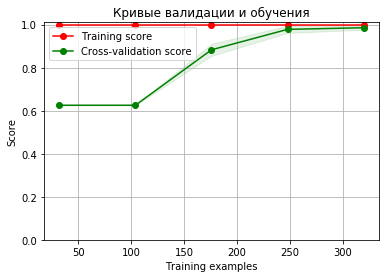

In [61]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    pyplot.figure()
    pyplot.title(title)
    if ylim is not None:
        pyplot.ylim(*ylim)
    pyplot.xlabel("Training examples")
    pyplot.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    pyplot.grid()

    pyplot.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    pyplot.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    pyplot.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    pyplot.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    pyplot.legend(loc="best")
    return pyplot



estimator = gcv.best_estimator_
plot_learning_curve(estimator, 'Кривые валидации и обучения', train_x, train_y, ylim=(0.0, 1.01), cv=skf, n_jobs=-1)


pyplot.show()

Модель очень критична к количеству данных. Наблюдается резкий прирост качества при увеличении обучающих примеров.

## 11. Прогноз для тестовой или отложенной выборке

Здесь будем оценивать качество линейного метода и RandomForest на всей выборке. Построим классификатор на основе средних векторов и Евклидова расстояния и рассчитаем его среднюю точность на всей выборке.

In [62]:
from tqdm import tqdm
all_roc = []
for ind,i in tqdm(enumerate(data_dict)):
    e_train_x, e_train_y, e_test_x, e_test_y = prepare_data(data_dict,ind)
    e_train_x = np.array(e_train_x)  
    e_train_y = np.array(e_train_y) 
    e_test_x = np.array(e_test_x) 
    e_test_y = np.array(e_test_y) 
    target = np.mean(e_train_x[np.where(e_train_y == 1)[0]],axis=0)
    target_norm = target / np.linalg.norm(target)
    e_test_x_normed = e_test_x/ np.linalg.norm(e_test_x,axis=0)[np.newaxis,:]
    predictions = np.sqrt(np.sum((e_test_x_normed - target_norm)**2,axis=1))
    all_roc.append(roc_auc_score(e_test_y,predictions))

np.mean(all_roc)

51it [00:00, 204.76it/s]


0.4830851764705883

Линейный подход не сработал результат получается случайный. Пробуем RandomForest c параметрами от кроссвалидации.

In [63]:
all_roc_forest = []
local_forest = RandomForestClassifier(max_depth=10,max_features=4,min_samples_leaf=3,n_estimators=200,random_state=RANDOM_STATE,n_jobs=-1)

for ind,i in tqdm(enumerate(data_dict)):
    e_train_x, e_train_y, e_test_x, e_test_y = prepare_data(data_dict,ind)
    e_train_x = np.array(e_train_x)  
    e_train_y = np.array(e_train_y) 
    e_test_x = np.array(e_test_x) 
    e_test_y = np.array(e_test_y) 

    
    local_forest.fit(e_train_x,e_train_y)
    predictions = local_forest.predict_proba(e_test_x)[:,1]
    all_roc_forest.append(roc_auc_score(e_test_y,predictions))

np.mean(all_roc_forest)

51it [00:43,  1.18it/s]


0.9775766274509804

RandomForest справился намного лучше.Сильного переобучения при подборе параметров не произошло, результаты отличаются не сильно.

## 12. Выводы 

В итоге мы получили хороший результат. Увидели, что линейное сравнение не работает, это говорит о том, что признаки поведения комбинируются сложнее чем рассчитывалось. Хорошо показал себя RandomForest. Был проработан сценарий верификации когда идет сравнение one-vs-all. С помощью случайного леса достигнута средняя ROC-AUC равная 0.9775. Я считаю это хорошим результатом. В данном случае можно сделать вывод о то том, что данная биометрическая верификация работает, и с ней можно работать. Насколько это будет работать в промышленных условиях вопрос открытый, так как там совершенно другие объемы и точность может значительно просесть.

Возможные улучшения:

- увеличение базы для приближения условий к промышленным
- применение нейронных сетей
- применение концепций обучения metric learning

Спасибо за внимание!